<a href="https://colab.research.google.com/github/CaptDoom/C-programs/blob/master/GAN_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    U

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

[]

In [ ]:
for gpus in gpus:
  print(gpu)

In [37]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [38]:
ds = tfds.load('fashion_mnist',split='train')

In [39]:
ds.as_numpy_iterator().next()['label']

2

In [40]:
import numpy as np
dataiterator = ds.as_numpy_iterator()

In [41]:
np.squeeze(dataiterator.next()['image'])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  77, 227, 227,
        208, 210, 225, 216,  85,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  61, 100,  97,  80,  57, 117,
        227, 238, 115,  49,  78, 106, 108,  71,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  81, 105,  80,  69,  72,  64,  44,
         21,  13,  44,  69,  75,  75,  80, 114,  80,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  26,  92,  69,  68,  75,  75,  71,  74,
         83,  75,  77,  78,  74,  74,  83,  77, 108,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  55,  92,  69,  74,  74,  71,  71,  77,
         69,  66,  75,  74,  77,  80,  80,  78,  94,  63,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  63,  95,  66,  68,  72,  72,  69,  72,
         74,  74,  74,  75,  75,  77,  80,  77, 106,  61,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  80, 108,  71,  69,  72,  71,  69,  72,
         75,  75,  72,  72,  75,  78,  72,  85, 128,  64,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  88, 120,  75,  74,  77,  75,  72,  77,
         74,  74,  77,  78,  83,  83,  66, 111, 123,  78,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  85, 134,  74,  85,  69,  75,  75,  74,
         75,  74,  75,  75,  81,  75,  61, 151, 115,  91,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  10,  85, 153,  83,  80,  68,  77,  75,  74,
         75,  74,  75,  77,  80,  68,  61, 162, 122,  78,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  30,  75, 154,  85,  80,  71,  80,  72,  77,
         75,  75,  77,  78,  77,  75,  49, 191, 132,  72,  15,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  58,  66, 174, 115,  66,  77,  80,  72,  78,
         75,  77,  78,  78,  77,  66,  49, 222, 131,  77,  37,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  69,  55, 179, 139,  55,  92,  74,  74,  78,
         74,  78,  77,  75,  80,  64,  55, 242, 111,  95,  44,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  74,  57, 159, 180,  55,  92,  64,  72,  74,
         74,  77,  75,  77,  78,  55,  66, 255,  97, 108,  49,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  74,  66, 145, 153,  72,  83,  58,  78,  77,
         75,  75,  75,  72,  80,  30, 132, 255,  37, 122,  60,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  80,  69, 142, 180, 142,  57,  64,  78,  74,
         75,  75,  75,  72,  85,  21, 185, 227,  37, 143,  63,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  83,  71, 136, 194, 126,  46,  69,  75,  72,
         75,  75,  75,  74,  78,  38, 139, 185,  60, 151,  58,   0,   0,
          0,   0],
       [  0,   0,   0,   4,  81,  74, 145, 177,  78,  49,  74,  77,  75,
         75,  75,  75,  74,  72,  63,  80, 156, 117, 153,  55,   0,   0,
          0,   0],
       [  0,   0,   0,  10,  80,  72, 157, 163,  61,  55,  75,  77,  75,
         77,  75,  75,  75,  77,  71,  60,  98, 156, 132,  58,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  77,  74, 157, 143,  43,  61,  72,  75,  77,
         75,  74,  77,  77,  75,  71,  58,  80, 157, 120,  66,   0,   0,
          0,   0],
       [  0,   0,   0,  18,  81,  74, 156, 114,  35,  72,  71,  75,  78,
         72,  66,  80,  78,  77,  75,  64,  63, 165, 119,  68,   0,   0,
          0,   0],
       [  0,   0,   0,  23,  85,  81, 177,  57,  52,  77,  71,  78,  80,
         72,  75,  74,  77,  77,  75,  64,  37, 173,  95,  72,   0,   0,
          0,   0],
       [  0,   0,   0,  26,  81,  86, 160,  20,  75,  77,  77,  80,  78,
         80,  89,  78,  81,  83,  80,  74,  20, 177,  77,  74,   0,   0,
          0,   0],
       [  0,   0,   0,  49,  77,  91, 200,   0,  83,  95,  86,  88,  88,
         89,  88,  89,  88,  83,  89,  86,   0, 191,  78,  80,  24,   0,
          0,   0],
       [  0,   0,   0,  54,  71, 108, 16

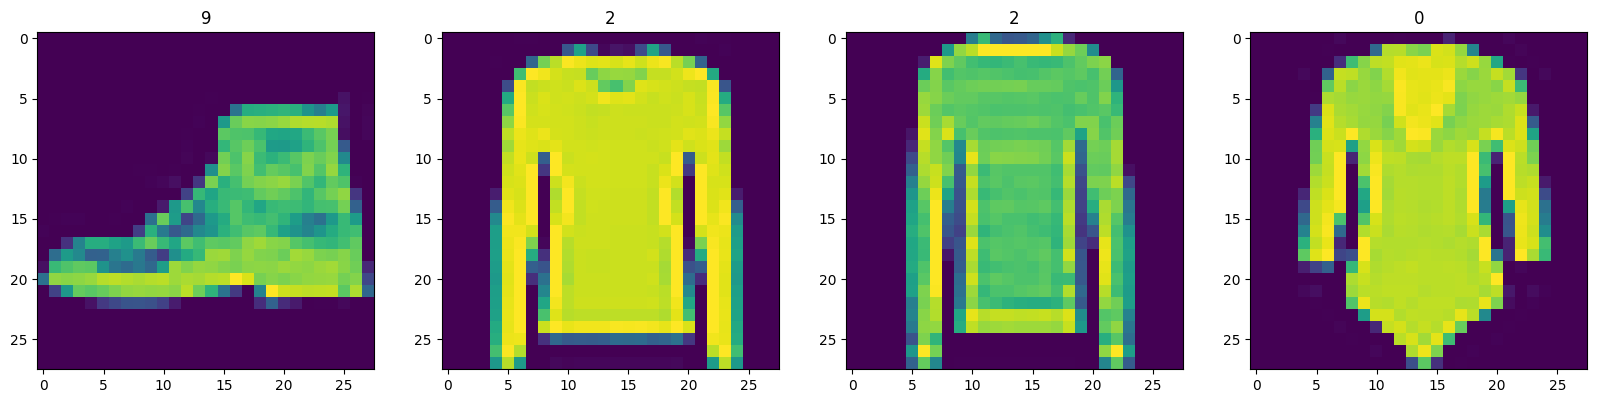

In [66]:
#Set up sub plot formatting
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [43]:
#scaling and retrurn image only
def scale_images(data):
  image = data['image']
  return image/255


In [ ]:
#Not a supervised learning

Mapping , batching

In [56]:
#reloading the dataset
ds = tfds.load('fashion_mnist', split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(6000)
ds = ds.batch(128)
ds = ds.prefetch(64)



In [57]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

BUILDING Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Reshape , LeakyReLU , Dropout , UpSampling2D


In [61]:
def build_generator():
  model = Sequential()
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7,7,128)))

  #upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  #upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolution block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolution block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  #output layer
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))


  return model

In [62]:
generator = build_generator()

In [63]:
generator.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_28 (LeakyReLU)           │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_7 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_11 (UpSampling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_29 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_12 (UpSampling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_30 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_31 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_32 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
img = generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [94]:
img.shape

(4, 28, 28, 1)

In [67]:
img.shape

(4, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


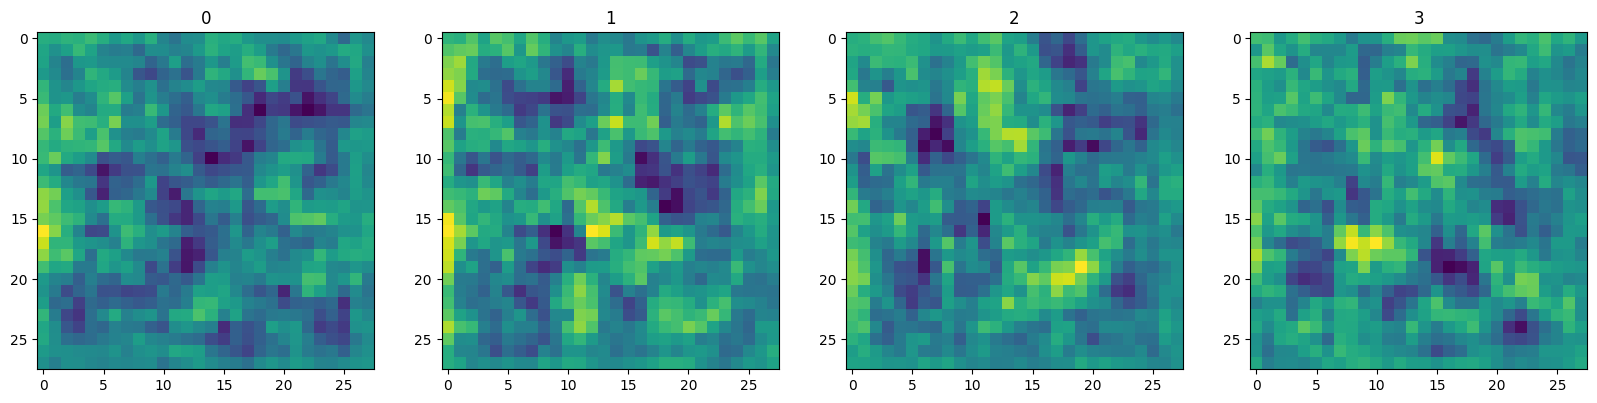

In [72]:
#Set up sub plot formatting
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

Buiding generator

In [88]:
def build_discriminator():
  model = Sequential()

  # First Conv block
  model.add(Conv2D(32, 5 , input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then passing to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model


In [89]:
discriminator = build_discriminator()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
discriminator.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_40 (LeakyReLU)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_41 (LeakyReLU)           │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_42 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_43 (LeakyReLU)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
img.shape

(4, 28, 28, 1)

In [97]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


array([[0.50286365],
       [0.50264484],
       [0.5027588 ],
       [0.50284487]], dtype=float32)